In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [30]:
df = pd.read_csv('train.csv', parse_dates=True, index_col=0)

In [31]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [32]:
x = df[['temp', 'season', 'atemp']]
y = df[['count']]
xneu=x.set_index('temp')
yneu=y.set_index('count')

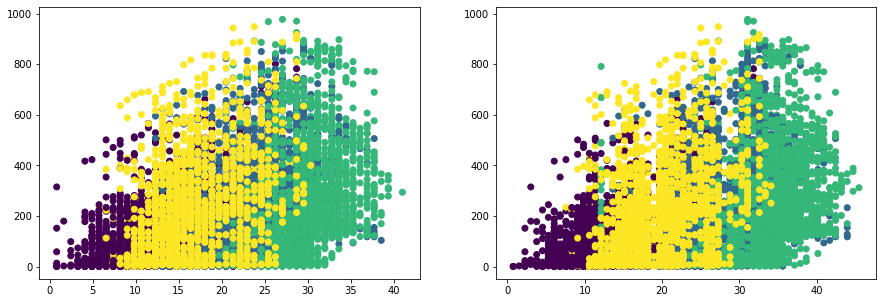

In [46]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
(ax1, ax2)=ax
ax1.scatter(x['temp'], y, c=x['season'])
ax2.scatter(x['atemp'], y, c=x['season'])


#plt.scatter(x['temp'], y, 'bo', c=x['season'] )
#plt.plot(x, ytrain, 'bo')

In [47]:
xarray = x.to_numpy()
yarray = y.to_numpy()

In [48]:
best_mse = np.Inf
best_a, best_b = None, None
for i in range(1000):
    a = np.random.random()*10
    b = np.random.random()*10
    ycalc= a*xarray +b
    mse = np.sum((ycalc-yarray)**2)/ycalc.shape[0]
    if mse <= best_mse:
        best_mse= mse
        best_a = a
        best_b = b

In [49]:
ycalc = best_a*x +best_b

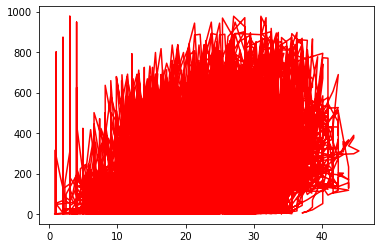

In [53]:
plt.plot(x, y, 'r-')
#plt.plot(xarray, yarray, 'bo')
#plt.plot(xarray,ycalc, 'g-')

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
best_mse

114092.91893918338

In [60]:
ycalc
#mean_squared_error(yarray, ycalc)
#xtrain=x.reshape(-1,1)

,temp,season,atemp
datetime,,,
2011-01-01 00:00:00,97.556333,18.873246,138.099484
2011-01-01 01:00:00,90.257675,18.873246,131.334875
2011-01-01 02:00:00,90.257675,18.873246,131.334875
2011-01-01 03:00:00,97.556333,18.873246,138.099484
2011-01-01 04:00:00,97.556333,18.873246,138.099484
...,...,...,...
2012-12-19 19:00:00,148.646934,45.575651,185.273733
2012-12-19 20:00:00,141.348277,45.575651,165.068913
2012-12-19 21:00:00,134.049620,45.575651,151.584199


In [61]:
m = LinearRegression()

In [62]:
m.fit(xarray, yarray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
m.score(xarray, yarray) # this is a R^2, not an accuracy!!!!

0.15964643971499914

In [64]:
xarray

array([[ 9.84 ,  1.   , 14.395],
       [ 9.02 ,  1.   , 13.635],
       [ 9.02 ,  1.   , 13.635],
       ...,
       [13.94 ,  4.   , 15.91 ],
       [13.94 ,  4.   , 17.425],
       [13.12 ,  4.   , 16.665]])

In [65]:
y_pred = m.predict

In [66]:
y_pred

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [67]:
mcal = m.coef_, m.intercept_
mcal

(array([[ 8.30433995, 10.64335437,  0.44038367]]), array([-13.5258995]))

In [242]:
#xx=x.reset_index()
#xarray = xx.to_numpy()
#y_pred=m.predict([xarray])

In [68]:
mcal2 = mcal[0]

In [69]:
mcal2

array([[ 8.30433995, 10.64335437,  0.44038367]])

In [70]:
acal = mcal2[0]
acal

array([ 8.30433995, 10.64335437,  0.44038367])

In [71]:
bcal = mcal[1]

In [72]:
bcal

array([-13.5258995])

In [73]:
z=20

In [74]:
ycal= acal*xarray+bcal

In [89]:
ycal =pd.DataFrame(ycal)

In [90]:
ycal

,0,1,2
0,68.188806,-2.882545,-7.186577
1,61.379247,-2.882545,-7.521268
2,61.379247,-2.882545,-7.521268
3,68.188806,-2.882545,-7.186577
4,68.188806,-2.882545,-7.186577
...,...,...,...
10881,115.855717,29.047518,-4.852543
10882,109.046158,29.047518,-5.852214
10883,102.236599,29.047518,-6.519395
10884,102.236599,29.047518,-5.852214


In [76]:
mean_squared_error(y, ycal)

ValueError: y_true and y_pred have different number of output (1!=3)

In [95]:
df=df.reset_index()

In [96]:
datetime = df[['datetime']]

In [97]:
datetime

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
10881,2012-12-19 19:00:00
10882,2012-12-19 20:00:00
10883,2012-12-19 21:00:00
10884,2012-12-19 22:00:00


In [100]:
downsampled = df.resample('D').sum()
downsampled

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'